In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error

data = pd.read_csv('HeightWeight20.csv')

X = data[['Height']]
y = data['Weight']

[897.1319074950932, 1866.2186716955157, 5267.321614785445]


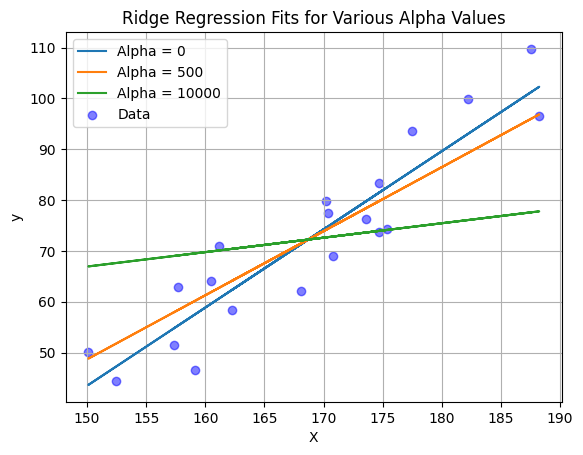

In [24]:
# กำหนดค่า alpha ที่ต้องการทดลอง
alphas = [0,500,10000]
sum_and_alpha_list = []
for alpha in alphas:
    model = Ridge(alpha=alpha)
    model.fit(X, y)
    y_pred = model.predict(X)

    # คำนวณผลรวมของการถอยหลังที่ยกกำลังสอง (SSR)
    ssr = np.sum((y - y_pred) ** 2)

    # คำนวณ L2 penalty
    l2_penalty = alpha * np.sum(model.coef_ ** 2)
    sum_and_alpha = ssr + l2_penalty
    sum_and_alpha_list.append(sum_and_alpha)
    # แสดงผลเส้นที่ได้จากค่า alpha
    plt.plot(X, y_pred, label=f'Alpha = {alpha}')

print(sum_and_alpha_list)
# การแสดงผลกราฟของข้อมูลและเส้นที่ได้
plt.scatter(X, y, color='blue', label='Data', alpha=0.5)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Ridge Regression Fits for Various Alpha Values')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

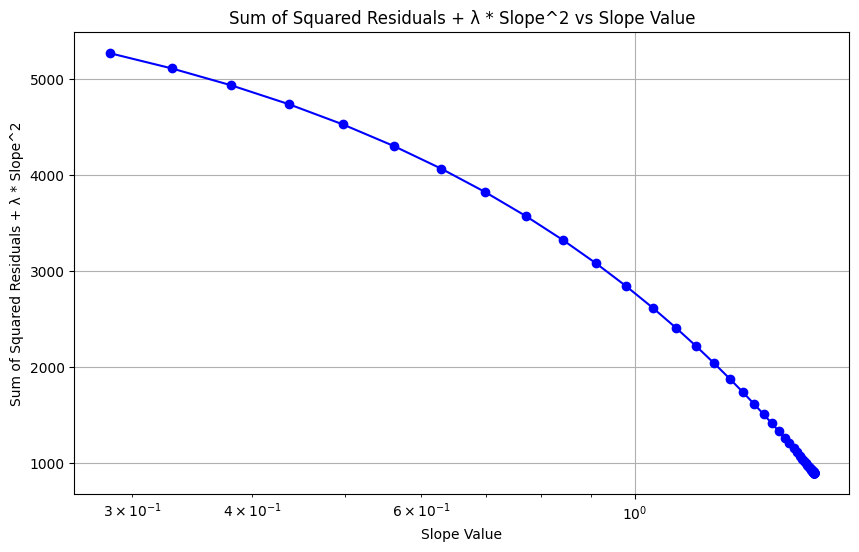

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge

# โหลดข้อมูล
data = pd.read_csv('HeightWeight20.csv')
X = data[['Height']]
y = data['Weight']

# กำหนดค่า alpha ที่ต้องการทดลอง
alphas = np.logspace(-4, 4, 100)  # ใช้ช่วงค่าที่กว้างขึ้น

# สำหรับเก็บค่าผลลัพธ์
slope_values = []
sum_and_alpha_list = []

for alpha in alphas:
    model = Ridge(alpha=alpha)
    model.fit(X, y)
    y_pred = model.predict(X)

    # คำนวณผลรวมของการถอยหลังที่ยกกำลังสอง (SSR)
    ssr = np.sum((y - y_pred) ** 2)

    # คำนวณ L2 penalty
    l2_penalty = alpha * np.sum(model.coef_ ** 2)
    sum_and_alpha = ssr + l2_penalty
    sum_and_alpha_list.append(sum_and_alpha)

    # เก็บค่า slope
    slope_values.append(model.coef_[0])

# สร้างกราฟ
plt.figure(figsize=(10, 6))
plt.plot(slope_values, sum_and_alpha_list, marker='o', linestyle='-', color='b')
plt.xlabel('Slope Value')
plt.ylabel('Sum of Squared Residuals + λ * Slope^2')
plt.title('Sum of Squared Residuals + λ * Slope^2 vs Slope Value')
plt.grid(True)
plt.xscale('log')  # ใช้ scale log สำหรับแกน x
plt.show()
